In [443]:
# Cài đặt các thư viện cần thiết
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") # Loại bỏ các cảnh báo
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

In [445]:
# Khai báo các giá trị tham số
path_file    = 'data_B10.csv'
random_state = 42   # dùng trong chia dữ liệu
test_size    = 0.3  # dùng trong chia dữ liệu
k_fold       = 5   # dùng trong đánh giá kiểm định chéo
DPI          = 200  # độ phân giải cho biểu đồ

In [447]:
# đọc dữ liệu sử dụng pandas
try:
    # đọc file csv
    df = pd.read_csv(path_file, header = 0, 
                     sep = ',',
                     skipinitialspace = True)
    print('Đọc file thành công !')
    print(df.head(5))
except FileNotFoundError:
    print(f"Lỗi : File '{path_file}' không tồn tại")

Đọc file thành công !
     F1    F2    F3    F4    F5    F6    F7 Class
0   9.8  1.52  3.71  18.1  12.1   6.1  41.2     H
1   1.3  4.61  3.12   2.2   2.9   9.1   5.8     L
2  12.3  4.42  2.81   3.0   2.5  10.0  31.2     H
3   1.6  3.80  2.90   2.2   2.7  11.0   7.0     H
4   5.8  1.30  3.50   3.9   1.3   5.2   3.3     L


In [449]:
# tiền xử lý dữ liệu


# Chuyển đổi các thuộc tính dạng ký tự sang số
Le = LabelEncoder()
df['Class'] = Le.fit_transform(df['Class'])

# chuẩn hoá dữ liệu min-max
# lấy dữ liệu chuẩn hoá từ dataframe
df_X = df.iloc[:,:-1]
df_y = df.iloc[:, -1]

# Chuẩn hoá dữ liệu theo phương pháp min-max trong đoạn từ 0.2 đến 0.7
scaler = MinMaxScaler(feature_range=(0.2,0.7))
df_X = scaler.fit_transform(df_X)
# Chuẩn hoá dữ liệu theo phương pháp Z-score
# scaler = StandardScaler()
# df_X = scaler.fit_transform(df_X)

In [451]:
# Danh sách để lưu trữ các chỉ số
results = {
    'Fold': [],
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

In [453]:
# Câu d.Đánh giá mô hình theo phương pháp kiểm định chéo
# khởi tạo hàm kiểm định chéo
kf = KFold(n_splits = k_fold , shuffle = False)

accuracies_gauss             = []
precisions_gauss             = []
recalls_gauss                = []
f1_scores_gauss              = []
train_times_gauss            = []
i = 1
for train_index, test_index in  kf.split(df_X):
    start = time.time()
    # Chia dữ liệu thành training và testing
    X_train, X_test = df_X[train_index],df_X[test_index]
    y_train, y_test = df_y[train_index],df_y[test_index]

    print( X_test.shape)

    #khưởi tạo mô hình
    model_gauss = GaussianNB()

    #huấn luyện mô hình 
    model_gauss.fit(X_train,y_train)

    finish = time.time() - start
    # dự đoán mô hình
    y_pred_gauss = model_gauss.predict(X_test)
    # đưa ra độ chính xác mô hình
    accuracy = accuracy_score(y_test,y_pred_gauss)
    precision = precision_score(y_test,y_pred_gauss)
    recall = recall_score(y_test,y_pred_gauss)
    f1score = f1_score(y_test,y_pred_gauss)

    #in ra kết quả
    print('Fold: ',i)
    print("{:<15}:  {:<5.4}".format("Accuracy",accuracy))
    print("{:<15}:  {:<5.4}".format("Precision",precision))
    print("{:<15}:  {:<5.4}".format("Recall",recall))
    print("{:<15}:  {:<5.4}".format("F1 - score",f1score))
    print("{:<15}:  {:<5.4}s".format("Time",finish))
    print("##################################################")
    
    results['Fold'].append(i)
    results['Model'].append('Naive Bayes')
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1score)
    
    # append vào các mảng
    accuracies_gauss.append(accuracy)
    precisions_gauss.append(precision)
    recalls_gauss.append(recall)
    f1_scores_gauss.append(f1score)
    train_times_gauss.append(finish)
    i = i+1
# Tính các giá trị trung bình
mean_accuracy_gauss = np.mean(accuracies_gauss)
std_acc_gauss      = np.std(accuracies_gauss)

mean_precision_gauss = np.mean(precisions_gauss)
std_pre_gauss       = np.std(precisions_gauss)

mean_recall_gauss = np.mean(recalls_gauss)
std_rec_gauss       = np.std(recalls_gauss)

mean_f1score_gauss = np.mean(f1_scores_gauss)
std_f1_gauss       = np.std(f1_scores_gauss)

mean_time_gauss = np.mean(train_times_gauss)
std_time_gauss  = np.std(train_times_gauss)

print("{:15}: {:<5.4} ± {:<5.4} ".format('mean_accuracy', mean_accuracy_gauss, std_acc_gauss))
print("{:15}: {:<5.4} ± {:<5.4} ".format('mean_precision', mean_precision_gauss, std_pre_gauss))
print("{:15}: {:<5.4} ± {:<5.4} ".format('mean_recall', mean_recall_gauss, std_rec_gauss))
print("{:15}: {:<5.4} ± {:<5.4} ".format('mean_f1_score', mean_f1score_gauss, std_f1_gauss))
print("{:15}: {:<5.4}s ± {:<5.4}s ".format('mean_time', mean_time_gauss, std_time_gauss))

(3, 7)
Fold:  1
Accuracy       :  0.6667
Precision      :  0.0  
Recall         :  0.0  
F1 - score     :  0.0  
Time           :  0.01307s
##################################################
(3, 7)
Fold:  2
Accuracy       :  0.6667
Precision      :  0.5  
Recall         :  1.0  
F1 - score     :  0.6667
Time           :  0.004999s
##################################################
(2, 7)
Fold:  3
Accuracy       :  0.0  
Precision      :  0.0  
Recall         :  0.0  
F1 - score     :  0.0  
Time           :  0.003994s
##################################################
(2, 7)
Fold:  4
Accuracy       :  0.5  
Precision      :  0.5  
Recall         :  1.0  
F1 - score     :  0.6667
Time           :  0.007924s
##################################################
(2, 7)
Fold:  5
Accuracy       :  1.0  
Precision      :  1.0  
Recall         :  1.0  
F1 - score     :  1.0  
Time           :  0.005015s
##################################################
mean_accuracy  : 0.5667 ± 0.3266 
mean_pre

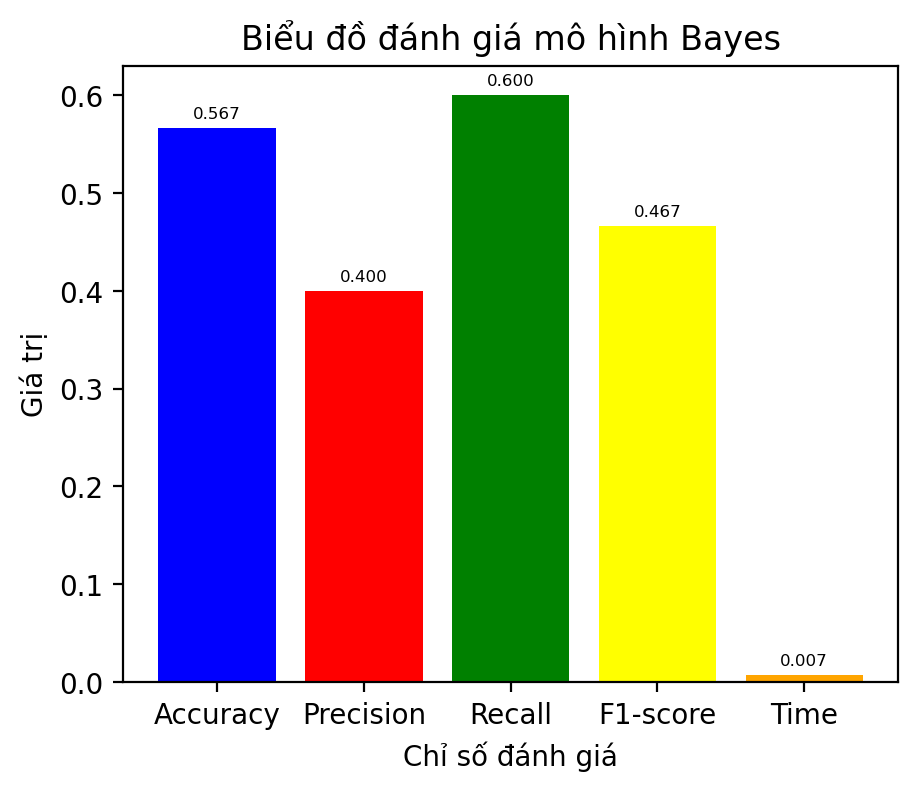

In [455]:
# Vẽ biểu đồ hiển thị các chỉ số đánh giá của mô hình Bayes qua phương pháp kiểm định chéo
Label = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'Time']
Value = [mean_accuracy_gauss, mean_precision_gauss, mean_recall_gauss, mean_f1score_gauss, mean_time_gauss]
plt.figure(figsize=(5,4),dpi=DPI)
color = ['blue', 'red', 'green', 'yellow', 'orange']
plt.bar(Label, Value, color=color)
# Thêm giá trị lên trên các cột
for i, v in enumerate(Value):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=6, color='black')
plt.title('Biểu đồ đánh giá mô hình Bayes')
plt.xlabel('Chỉ số đánh giá')
plt.ylabel('Giá trị')
plt.savefig('bayes.svg')
plt.show()

In [457]:
# Chuẩn bị dữ liệu huấn luyện

# đánh giá theo phương pháp chia tỷ lệ với 30% cho tập test và 70% cho tập train
X_train, X_test, y_train, y_test = train_test_split(df_X,df_y,
                                                 test_size = test_size,
                                                 random_state= random_state)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8, 7), (4, 7), (8,), (4,))

In [459]:
# Khởi tạo và huấn luyện mô hình

# Khởi tạo mô hình bayes
gnb = GaussianNB()
start_time = time.time() 
gnb.fit(X_train, y_train)
end_time = time.time()
y_pred_gnb = gnb.predict(X_test)
print(classification_report(y_test,y_pred_gnb))
report = classification_report(y_test,y_pred_gnb, output_dict = True)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.25      1.00      0.40         1

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4



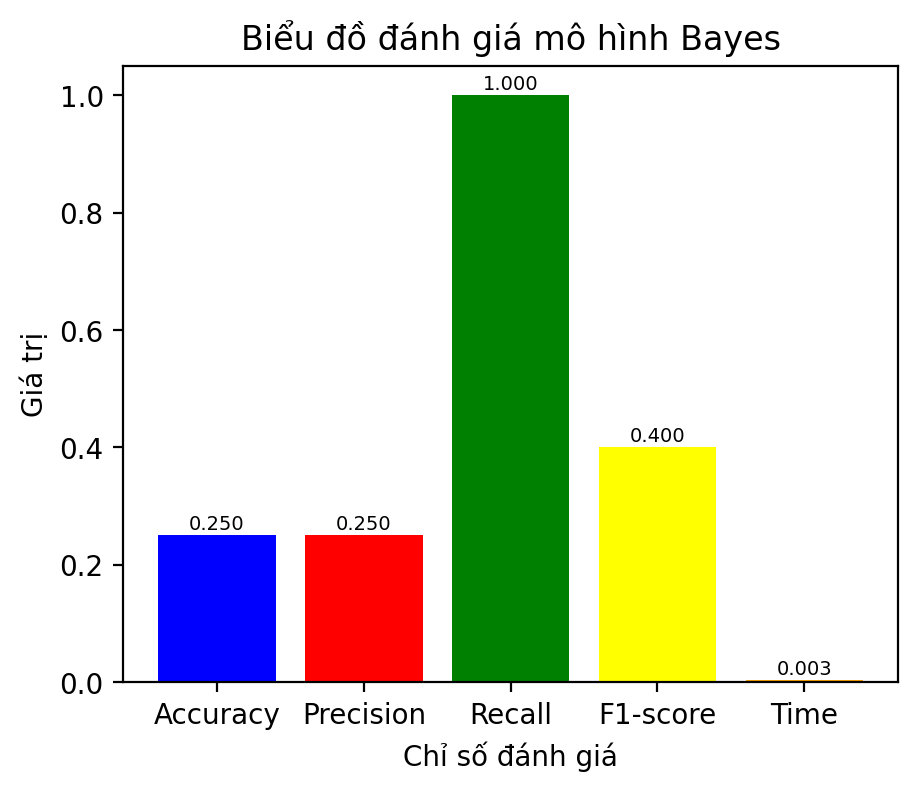

In [461]:
accuracy = accuracy_score(y_test, y_pred_gnb)
precision = precision_score(y_test, y_pred_gnb)
recall = recall_score(y_test, y_pred_gnb)
f1score = f1_score(y_test, y_pred_gnb)
execution_time = end_time - start_time

# 4. Hiển thị các chỉ số
Label = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'Time']
Value = [accuracy, precision, recall, f1score, execution_time]

# 5. Vẽ biểu đồ
color = ['blue', 'red', 'green', 'yellow', 'orange']
plt.figure(figsize=(5, 4), dpi=DPI)
plt.bar(Label, Value, color=color)

# Thêm giá trị trên cột
for i, v in enumerate(Value):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=7)

plt.title('Biểu đồ đánh giá mô hình Bayes')
plt.xlabel('Chỉ số đánh giá')
plt.ylabel('Giá trị')
plt.savefig('bayes_evaluation.svg')
plt.show()

In [463]:
# Đánh giá mô hình theo phương pháp kiểm định chéo bằng mô hình phi xác suất KNN
# khởi tạo hàm kiểm định chéo
kf = KFold(n_splits = k_fold , shuffle = False)

accuracies_knn             = []
precisions_knn             = []
recalls_knn                = []
f1_scores_knn              = []
train_times_knn            = []
i = 1
for train_index, test_index in  kf.split(df_X):
    start = time.time()
    # Chia dữ liệu thành training và testing
    X_train, X_test = df_X[train_index],df_X[test_index]
    y_train, y_test = df_y[train_index],df_y[test_index]

    print( X_test.shape)

    #khưởi tạo mô hình
    model_knn = KNeighborsClassifier(n_neighbors=3)

    #huấn luyện mô hình 
    model_knn.fit(X_train,y_train)

    finish = time.time() - start
    # dự đoán mô hình
    y_pred_knn = model_knn.predict(X_test)
    # đưa ra độ chính xác mô hình
    accuracy = accuracy_score(y_test,y_pred_knn)
    precision = precision_score(y_test,y_pred_knn)
    recall = recall_score(y_test,y_pred_knn)
    f1score = f1_score(y_test,y_pred_knn)

    #in ra kết quả
    print('Fold: ',i)
    print("{:<15}:  {:<5.4}".format("Accuracy",accuracy))
    print("{:<15}:  {:<5.4}".format("Precision",precision))
    print("{:<15}:  {:<5.4}".format("Recall",recall))
    print("{:<15}:  {:<5.4}".format("F1 - score",f1score))
    print("{:<15}:  {:<5.4}s".format("Time",finish))
    print("##################################################")

    results['Fold'].append(i)
    results['Model'].append('KNN')
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1score)
    
    # append vào các mảng
    accuracies_knn.append(accuracy)
    precisions_knn.append(precision)
    recalls_knn.append(recall)
    f1_scores_knn.append(f1score)
    train_times_knn.append(finish)
    i = i+1
# Tính các giá trị trung bình
mean_accuracy_knn = np.mean(accuracies_knn)
std_acc_knn       = np.std(accuracies_knn)

mean_precision_knn = np.mean(precisions_knn)
std_pre_knn        = np.std(precisions_knn)

mean_recall_knn = np.mean(recalls_knn)
std_rec_knn     = np.std(recalls_knn)

mean_f1score_knn = np.mean(f1_scores_knn)
std_f1_knn       = np.std(f1_scores_knn)

mean_time_knn = np.mean(train_times_knn)
std_time_knn  = np.std(train_times_knn)

print("{:15}: {:<5.4} ± {:<5.4} ".format('mean_accuracy', mean_accuracy_knn, std_acc_knn))
print("{:15}: {:<5.4} ± {:<5.4} ".format('mean_precision', mean_precision_knn, std_pre_knn))
print("{:15}: {:<5.4} ± {:<5.4} ".format('mean_recall', mean_recall_knn, std_rec_knn))
print("{:15}: {:<5.4} ± {:<5.4} ".format('mean_f1_score', mean_f1score_knn, std_f1_knn))
print("{:15}: {:<5.4}s ± {:<5.4}s ".format('mean_time', mean_time_knn, std_time_knn))

(3, 7)
Fold:  1
Accuracy       :  0.6667
Precision      :  0.5  
Recall         :  1.0  
F1 - score     :  0.6667
Time           :  0.006906s
##################################################
(3, 7)
Fold:  2
Accuracy       :  0.0  
Precision      :  0.0  
Recall         :  0.0  
F1 - score     :  0.0  
Time           :  0.005008s
##################################################
(2, 7)
Fold:  3
Accuracy       :  1.0  
Precision      :  1.0  
Recall         :  1.0  
F1 - score     :  1.0  
Time           :  0.004015s
##################################################
(2, 7)
Fold:  4
Accuracy       :  0.5  
Precision      :  0.5  
Recall         :  1.0  
F1 - score     :  0.6667
Time           :  0.003998s
##################################################
(2, 7)
Fold:  5
Accuracy       :  0.5  
Precision      :  0.5  
Recall         :  1.0  
F1 - score     :  0.6667
Time           :  0.005002s
##################################################
mean_accuracy  : 0.5333 ± 0.3232 
mean_pr

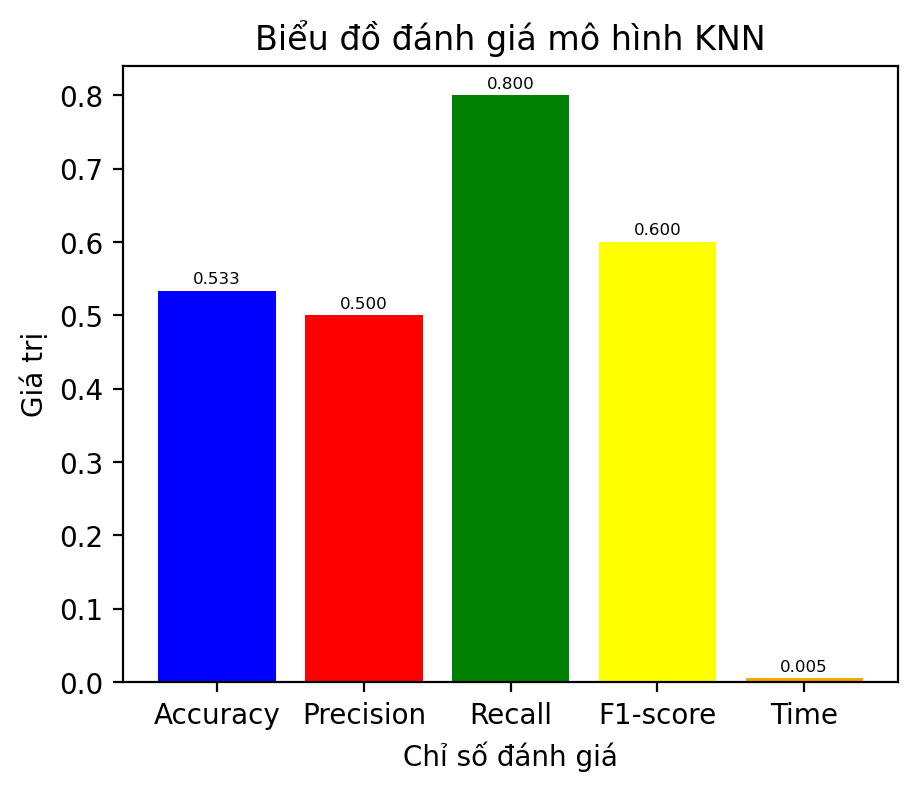

In [465]:
# Vẽ biểu đồ hiển thị các chỉ số đánh giá của mô hình Bayes qua phương pháp kiểm định chéo
Label = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'Time']
Value = [mean_accuracy_knn, mean_precision_knn, mean_recall_knn, mean_f1score_knn, mean_time_knn]
plt.figure(figsize=(5,4),dpi=DPI)
color = ['blue', 'red', 'green', 'yellow', 'orange']
plt.bar(Label, Value, color=color)
# Thêm giá trị lên trên các cột
for i, v in enumerate(Value):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=6, color='black')
plt.title('Biểu đồ đánh giá mô hình KNN')
plt.xlabel('Chỉ số đánh giá')
plt.ylabel('Giá trị')
plt.savefig('knn.svg')
plt.show()

In [467]:
# Khởi tạo và huấn luyện mô hình

# Khởi tạo mô hình bayes
knn = KNeighborsClassifier(n_neighbors=3)
start_time = time.time() 
knn.fit(X_train, y_train)
end_time = time.time()
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test,y_pred_knn))
report = classification_report(y_test,y_pred_knn, output_dict = True)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



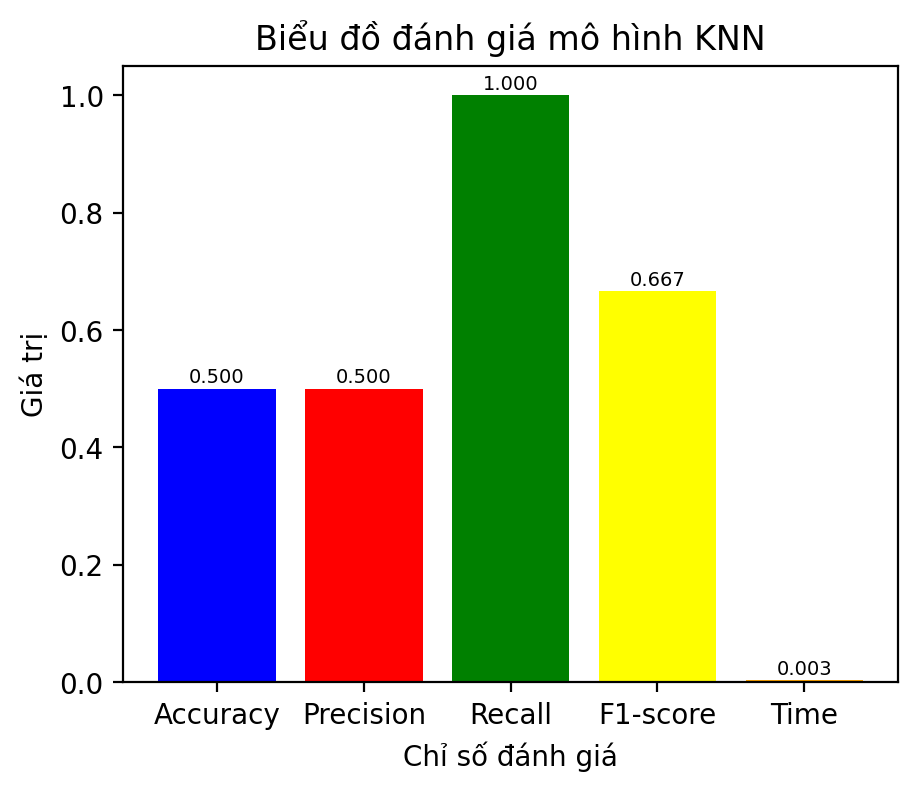

In [469]:
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1score = f1_score(y_test, y_pred_knn)
execution_time = end_time - start_time

# 4. Hiển thị các chỉ số
Label = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'Time']
Value = [accuracy, precision, recall, f1score, execution_time]

# 5. Vẽ biểu đồ
color = ['blue', 'red', 'green', 'yellow', 'orange']
plt.figure(figsize=(5, 4), dpi=DPI)
plt.bar(Label, Value, color=color)
for i, v in enumerate(Value):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=7)

plt.title('Biểu đồ đánh giá mô hình KNN')
plt.xlabel('Chỉ số đánh giá')
plt.ylabel('Giá trị')
plt.savefig('knn_evaluation.svg')
plt.show()

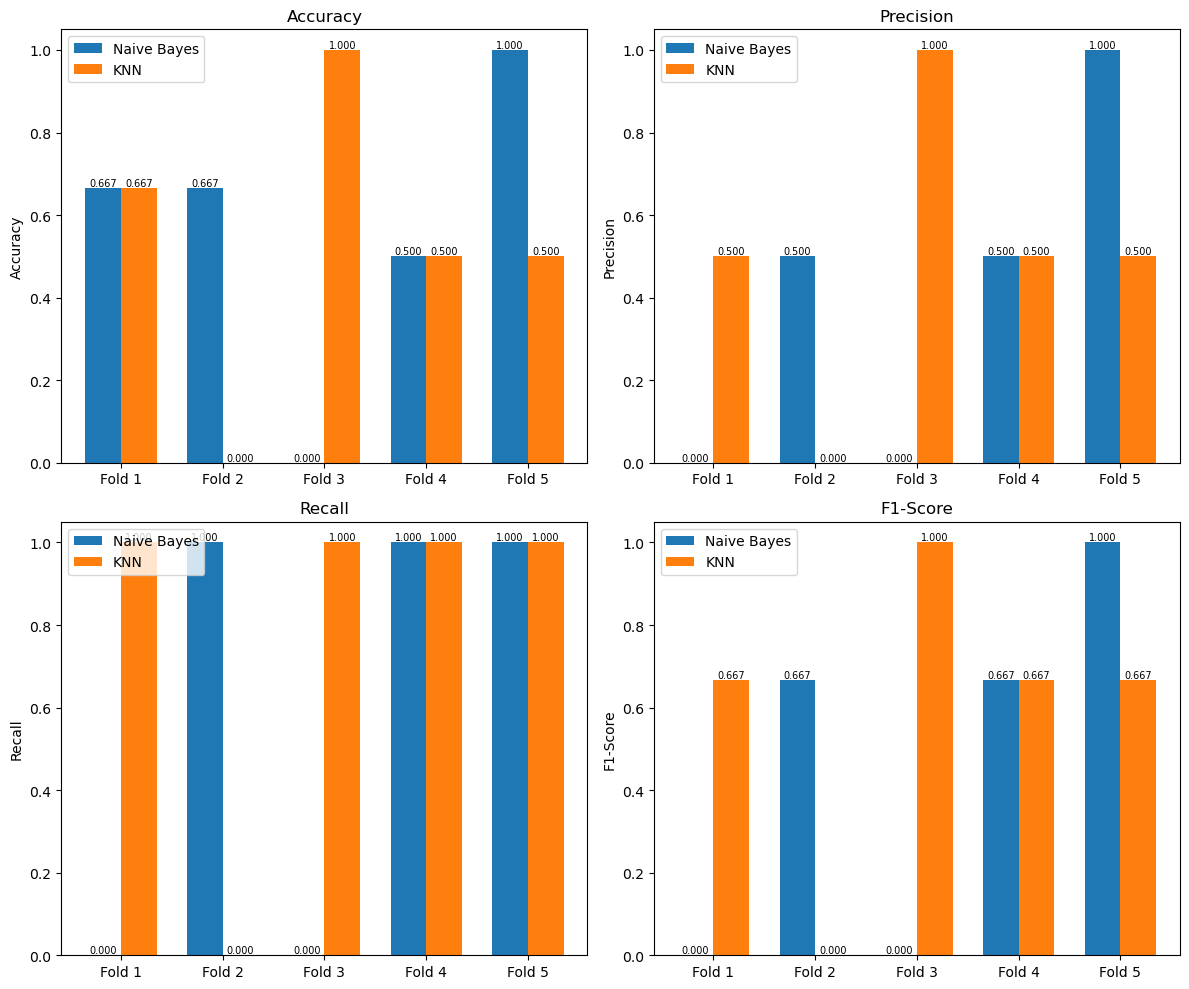

In [475]:
# Chuyển đổi kết quả thành DataFrame
results_df = pd.DataFrame(results)

# Tạo các subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 hàng, 2 cột cho 4 biểu đồ

for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]  
    for j, model in enumerate(results_df['Model'].unique()):
        subset = results_df[results_df['Model'] == model]
        bar_positions = x + (j - 0.5) * bar_width  
        bars = ax.bar(bar_positions, subset[metric], width=bar_width, label=model)
        
        # Thêm giá trị trên mỗi cột
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,  
                height,                           
                f'{height:.3f}',                   
                ha='center', va='bottom', fontsize=7 
            )
    
    ax.set_title(f'{metric}')
    ax.set_ylabel(metric)
    ax.set_xticks(x) 
    ax.set_xticklabels([f'Fold {fold}' for fold in subset['Fold'].unique()])  
    ax.legend()

plt.tight_layout()
plt.savefig('Compare.svg')
plt.show()